In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [113]:
import warnings
warnings.filterwarnings('ignore')
print('The script still runs.')

The script still runs.


In [114]:
df = pd.read_csv(r'C:\Users\dell\Downloads\kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [115]:
columns = pd.read_csv(r'C:\Users\dell\Downloads/data_description.txt',sep='-')
columns=columns.reset_index()

In [116]:
columns.columns=['cols','abb_col_names']
columns

,cols,abb_col_names
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [117]:
df.columns = columns['abb_col_names'].values
df.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [118]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [119]:
def convert_dtype(df,feature):
    df[feature]=pd.to_numeric(df[feature],errors='coerce')

In [120]:
features=['packed cell volume','white blood cell count','red blood cell count']
for feature in features:
    convert_dtype(df,feature)

In [121]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [122]:
df.drop('id',axis=1,inplace=True)


Cleaning the data

In [123]:
def extract_cat_num(df):
    cat_col = [col for col in df.columns if df[col].dtype=='object']
    num_col = [col for col in df.columns if df[col].dtype!='object']
    return cat_col,num_col

In [124]:
cat_col,num_col = extract_cat_num(df)

In [125]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [126]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [127]:
for col in cat_col :
    print('{} has {} values' .format(col,df[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values


 pus cell has ['normal' 'abnormal' nan] values


pus cell clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


ypertension has ['yes' 'no' nan] values


diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values


coronary artery disease has ['no' 'yes' '\tno' nan] values


appetite has ['good' 'poor' nan] values


pedal edema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'ckd\t' 'notckd'] values




In [128]:
df['diabetes mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes'},inplace=True)

df['coronary artery disease'].replace(to_replace={'\tno':'no'},inplace=True)

df['class'].replace(to_replace={'ckd\t':'ckd'},inplace=True)


In [129]:
for col in cat_col :
    print('{} has {} values' .format(col,df[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values


 pus cell has ['normal' 'abnormal' nan] values


pus cell clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


ypertension has ['yes' 'no' nan] values


diabetes mellitus has ['yes' 'no' ' yes' nan] values


coronary artery disease has ['no' 'yes' nan] values


appetite has ['good' 'poor' nan] values


pedal edema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'notckd'] values




In [130]:
len(num_col)

14

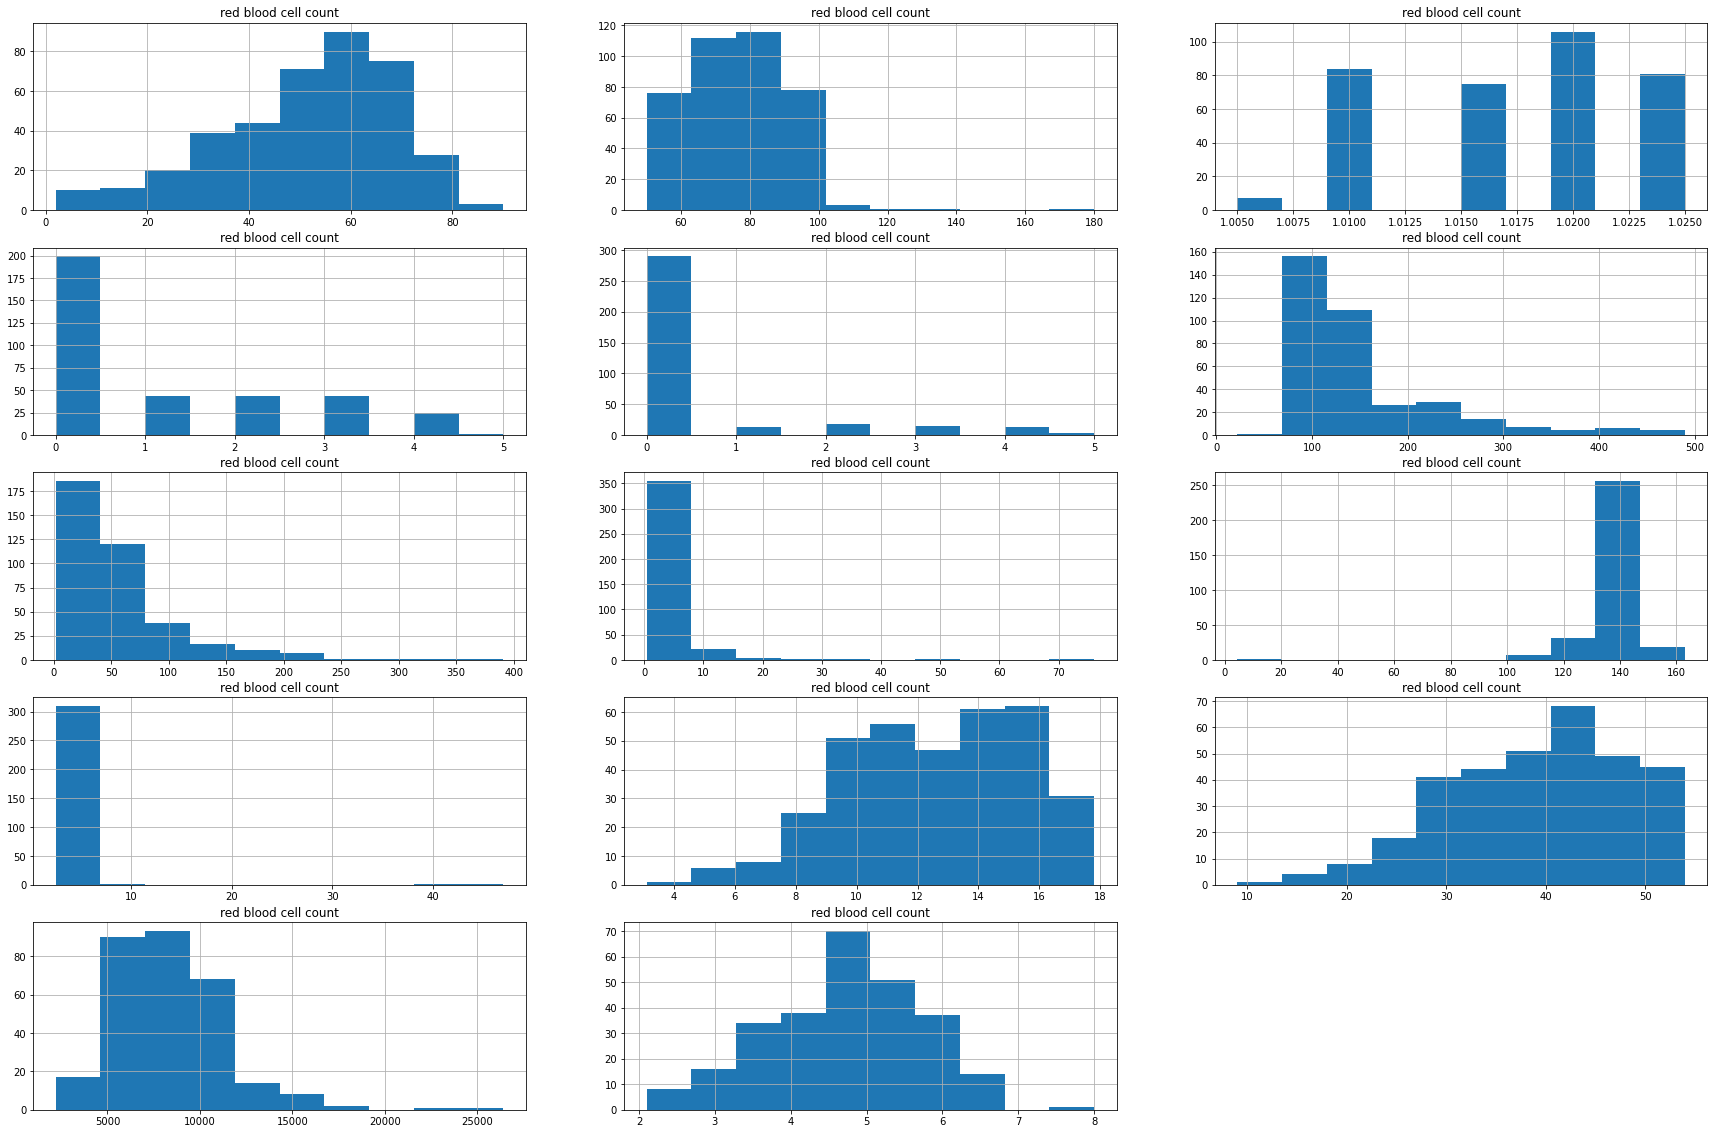

In [131]:
plt.figure(figsize=(30,20))

for i,features in enumerate(num_col):
    plt.subplot(5,3,i+1)
    df[features].hist()
    plt.title(feature)

label distribution of categorical data

In [132]:
len(cat_col)

11

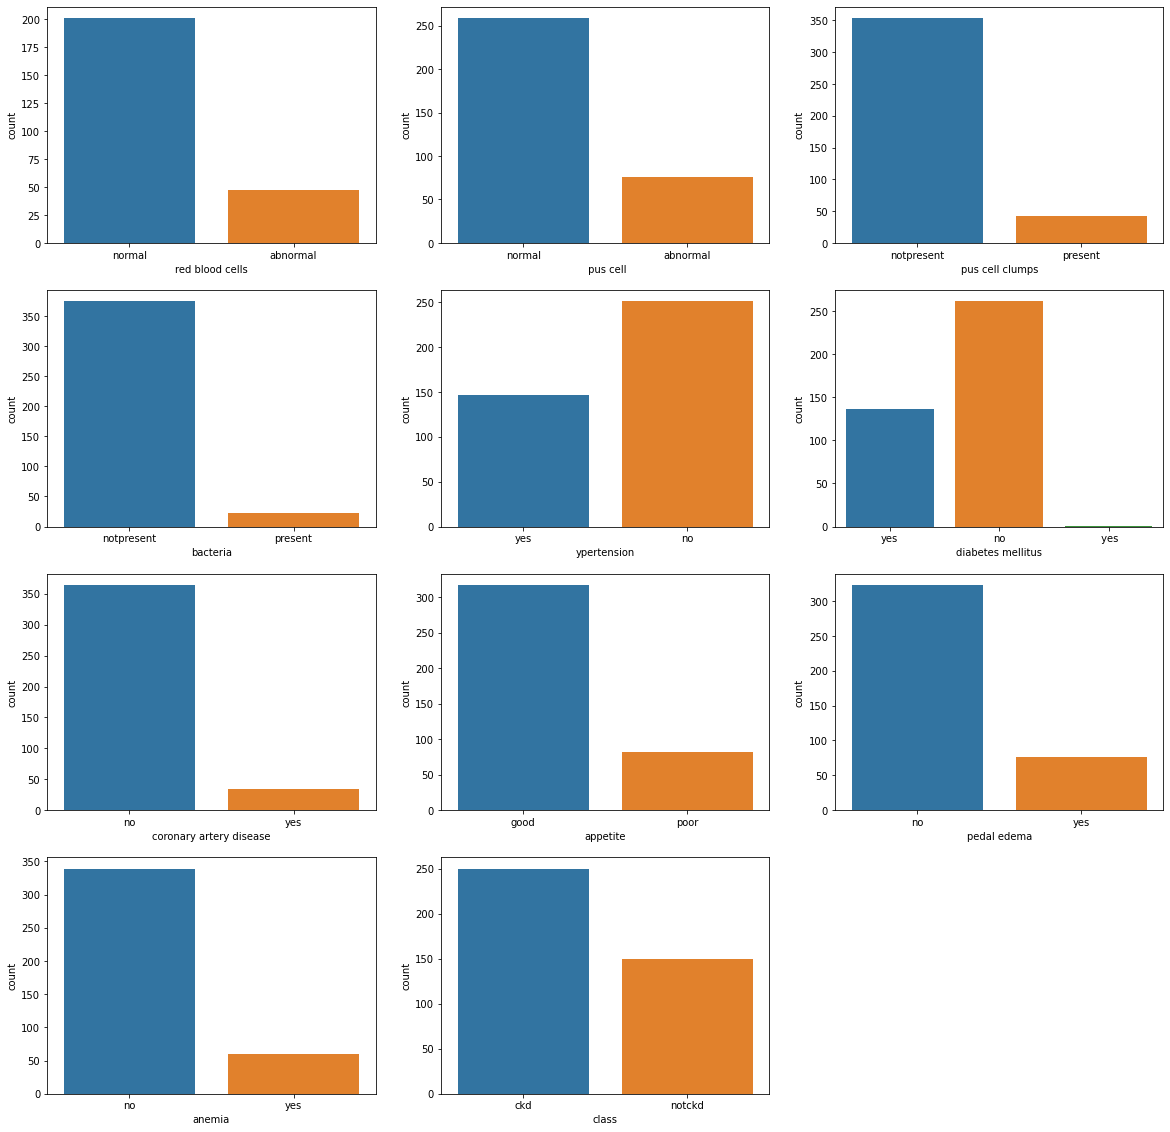

In [133]:
plt.figure(figsize=(20,20))
plt.title("Analysis of categorical inputs")
for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    #count of each and every labels
    sns.countplot(df[feature])

    

<AxesSubplot:xlabel='class', ylabel='count'>

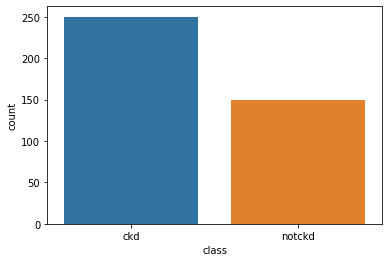

In [134]:
sns.countplot(df['class'])

Correlation in data- check how columns are corelated with each other and its impact on target feature

<AxesSubplot:>

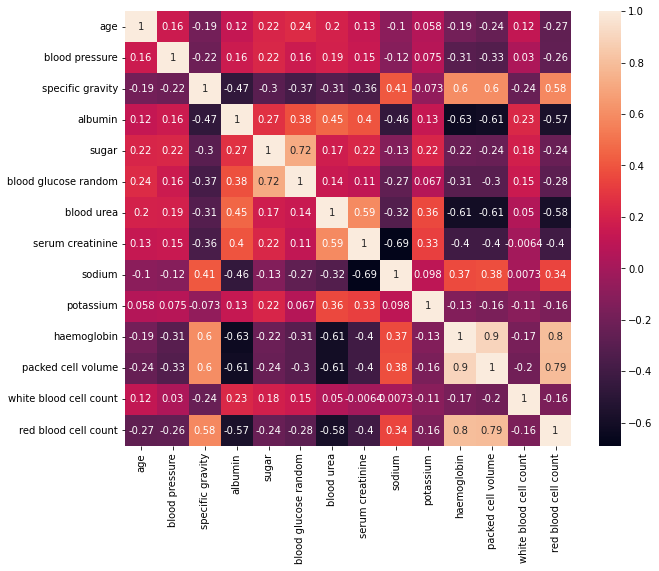

In [135]:
plt.figure(figsize=(10,8))
df.corr()
sns.heatmap(df.corr(),annot=True)

In [136]:
df.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','median','max'])

count      mean  median  max
red blood cells class                               
abnormal        ckd        25  3.832000     3.7  5.6
normal          ckd        40  3.782500     3.8  8.0
                notckd    134  5.368657     5.3  6.5

In [137]:
# !pip install plotly

In [138]:
import plotly.express as px

In [139]:
px.violin(df,y='red blood cell count',x='class',color='class')

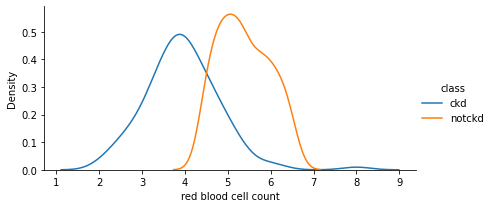

In [140]:
grid = sns.FacetGrid(df,hue='class',aspect=2)
grid.map(sns.kdeplot,'red blood cell count')
grid.add_legend()

In [141]:
def violin(col):
    fig = px.violin(df,y=col,x='class',color='class',box=True)
    return fig.show()

In [142]:
def scatters(col1,col2):
    fig = px.scatter(df,x=col1,y=col2,color='class')
    return fig.show()

In [143]:
def kde_plot(feature):
  grid = sns.FacetGrid(df,hue='class',aspect=2)
  grid.map(sns.kdeplot,feature)
  grid.add_legend()

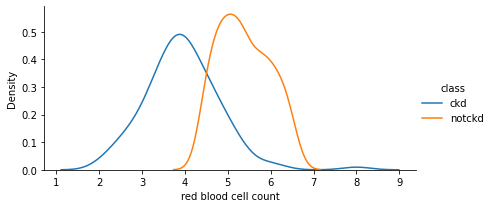

In [144]:
kde_plot('red blood cell count')

In [145]:
violin('red blood cell count')

Exploratory data analysis

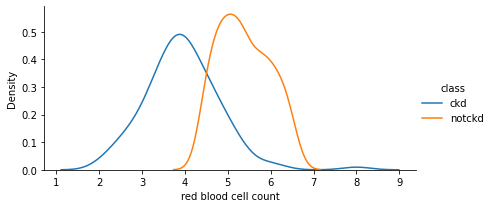

In [146]:
kde_plot('red blood cell count')

In [147]:
df.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

In [148]:
scatters('red blood cell count','packed cell volume')

In [149]:
df.isna().sum().sort_values()

class                        0
pedal edema                  1
appetite                     1
anemia                       1
coronary artery disease      2
diabetes mellitus            2
ypertension                  2
pus cell clumps              4
bacteria                     4
age                          9
blood pressure              12
serum creatinine            17
blood urea                  19
blood glucose random        44
albumin                     46
specific gravity            47
sugar                       49
haemoglobin                 52
 pus cell                   65
packed cell volume          71
sodium                      87
potassium                   88
white blood cell count     106
red blood cell count       131
red blood cells            152
dtype: int64

Fill missing values with mean,median, std dev

In [150]:
data = df.copy()

In [151]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [152]:
data['red blood cells'].dropna().sample()

358    normal
Name: red blood cells, dtype: object

In [153]:
data['red blood cells'].isnull().sum()

152

In [154]:
random_sample = data['red blood cells'].dropna().sample(152)
random_sample

133    normal
371    normal
299    normal
292    normal
274    normal
        ...  
338    normal
84     normal
313    normal
392    normal
298    normal
Name: red blood cells, Length: 152, dtype: object

In [155]:
data[data['red blood cells'].isnull()].index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [156]:
random_sample.index

Int64Index([133, 371, 299, 292, 274,  11, 329, 319, 210, 391,
            ...
            303, 195, 361, 233, 262, 338,  84, 313, 392, 298],
           dtype='int64', length=152)

In [157]:
random_sample.index = data[data['red blood cells'].isnull()].index

In [158]:
random_sample.index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [159]:
data.loc[data['red blood cells'].isnull(),'red blood cells'] = random_sample

In [160]:
data['red blood cells'].isnull().sum()

0

In [161]:
def random_value_Imputation(feature):
    random_sample = data[feature].dropna().sample(data[feature].isnull().sum())
    random_sample.index = data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature] = random_sample

In [162]:
data[num_col].isnull().sum()

age                         9
blood pressure             12
specific gravity           47
albumin                    46
sugar                      49
blood glucose random       44
blood urea                 19
serum creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64

In [163]:
for col in num_col:
    random_value_Imputation(col)

In [164]:
data[num_col].isnull().sum()

age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

In [165]:
data[cat_col].isnull().sum()

red blood cells             0
 pus cell                  65
pus cell clumps             4
bacteria                    4
ypertension                 2
diabetes mellitus           2
coronary artery disease     2
appetite                    1
pedal edema                 1
anemia                      1
class                       0
dtype: int64

In [166]:
 data['pus cell clumps'].mode()[0]

'notpresent'

In [167]:
def impute_mode(feature):
    mode=data[feature].mode()[0]
    data[feature]=data[feature].fillna(mode)

In [168]:
for col in cat_col:
    impute_mode(col)

In [169]:
data[cat_col].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [170]:
for col in cat_col:
    print('{} has {} categories'.format(col,data[col].nunique()))
    

red blood cells has 2 categories
 pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
ypertension has 2 categories
diabetes mellitus has 3 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anemia has 2 categories
class has 2 categories


Label encoding

In [171]:
from sklearn.preprocessing import LabelEncoder

In [172]:
le = LabelEncoder()


In [173]:
for col in cat_col:
    data[col] = le.fit_transform(data[col])

In [174]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,101.0,...,38.0,6000.0,4.9,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,5.0,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,1,0,0,0,0,0


Feature selection

In [175]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import chi2

In [176]:
ind_col =[col for col in data.columns if col!='class']
dep_col = 'class'

In [177]:
x = data[ind_col]
y=data[dep_col]

In [178]:
x.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,2,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,101.0,...,11.3,38.0,6000.0,4.9,0,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,5.0,0,2,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,1,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,1,0,0,0,0


In [179]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int32

In [180]:
ordered_rank_features = SelectKBest(score_func=chi2,k=20)
ordered_feature = ordered_rank_features.fit(x,y)

In [181]:
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x000002836F4DAA60>)

In [182]:
ordered_feature.scores_

array([1.14362844e+02, 7.89035489e+01, 5.51023751e-03, 2.36760563e+02,
       1.07400000e+02, 8.51570415e+00, 1.06962963e+01, 2.52000000e+01,
       1.32000000e+01, 2.49862042e+03, 2.60012570e+03, 3.60237773e+02,
       2.93599734e+01, 2.69155973e+00, 1.14765968e+02, 3.21634722e+02,
       1.58704365e+04, 1.72851034e+01, 8.82000000e+01, 2.04392523e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [183]:
datascores=pd.DataFrame(ordered_feature.scores_,columns=['Score'])
datascores

,Score
0,114.362844
1,78.903549
2,0.005510
3,236.760563
4,107.400000
5,8.515704
6,10.696296
7,25.200000
8,13.200000
9,2498.620416


In [184]:
dfcols = pd.DataFrame(x.columns)
dfcols

,0
0,age
1,blood pressure
2,specific gravity
3,albumin
4,sugar
5,red blood cells
6,pus cell
7,pus cell clumps
8,bacteria
9,blood glucose random


In [185]:
features_rank=pd.concat([dfcols,datascores],axis=1)
features_rank

,0,Score
0,age,114.362844
1,blood pressure,78.903549
2,specific gravity,0.005510
3,albumin,236.760563
4,sugar,107.400000
5,red blood cells,8.515704
6,pus cell,10.696296
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2498.620416


In [186]:
features_rank.columns=['features','score']
features_rank

,features,score
0,age,114.362844
1,blood pressure,78.903549
2,specific gravity,0.005510
3,albumin,236.760563
4,sugar,107.400000
5,red blood cells,8.515704
6,pus cell,10.696296
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2498.620416


In [187]:
selected_columns=features_rank.nlargest(10,'score')['features'].values
selected_columns

array(['white blood cell count', 'blood urea', 'blood glucose random',
       'serum creatinine', 'packed cell volume', 'albumin', 'haemoglobin',
       'age', 'sugar', 'ypertension'], dtype=object)

In [188]:
x_new=data[selected_columns]
x_new.head()

,white blood cell count,blood urea,blood glucose random,serum creatinine,packed cell volume,albumin,haemoglobin,age,sugar,ypertension
0,7800.0,36.0,121.0,1.2,44.0,1.0,15.4,48.0,0.0,1
1,6000.0,18.0,101.0,0.8,38.0,4.0,11.3,7.0,0.0,0
2,7500.0,53.0,423.0,1.8,31.0,2.0,9.6,62.0,3.0,0
3,6700.0,56.0,117.0,3.8,32.0,4.0,11.2,48.0,0.0,1
4,7300.0,26.0,106.0,1.4,35.0,2.0,11.6,51.0,0.0,0


In [189]:
from sklearn.model_selection import train_test_split

In [190]:
X_train,X_test,y_train,y_test = train_test_split(x_new,y,random_state=0,test_size=0.25)

In [191]:
X_train.shape

(300, 10)

In [192]:
X_test.shape

(100, 10)

In [193]:
!pip install xgboost

In [194]:
from xgboost import XGBClassifier

In [195]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [196]:
params={
    'learning_rate':[0.05,0.20,0.25],
    'max_depth':[5,8,10],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.4],
    'colsample_bytree':[0.3,0.4,0.7]
}

In [197]:
from sklearn.model_selection import RandomizedSearchCV

In [198]:
classifier = XGBClassifier()

In [199]:
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [200]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                

In [204]:
classifier=random_search.best_estimator_

In [205]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 8,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [206]:
y_pred=classifier.predict(X_test)


In [208]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [209]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [211]:
confusion_matrix(y_test,y_pred)

array([[60,  2],
       [ 1, 37]], dtype=int64)

In [212]:
accuracy_score(y_test,y_pred)

0.97